In [1]:
import os
import gzip
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load data

* **Source**: [BG-dictionary-2024](https://huggingface.co/datasets/thebogko/bulgarian-dictionary-2024)

In [2]:
# Read the csv file in the gzip archive
words_df = pd.read_csv("hf://datasets/thebogko/bulgarian-dictionary-2024/single_words_bg.csv")
words_df.index.name = 'id'
print(f"Total words count: {len(words_df):,}")
words_df.head(10)

Total words count: 1,147,604


,word,tag
id,,
0,C-класа,N
1,C-класата,N
2,G-класа,N
3,G-класата,N
4,S-образен,A
5,S-образна,A
6,S-образната,A
7,S-образни,A
8,S-образните,A


## 2. Remove spaced words

In [3]:
spaced_words = words_df[words_df['word'].str.contains(" ")]
print(f"Number of spaced words: {len(spaced_words):,}")

Number of spaced words: 0


## 3. Remove dashed words

In [4]:
dashed_words = words_df[words_df['word'].str.contains("-")]
print(f"Number of dashed words: {len(dashed_words):,}")
dashed_words.sample(10)

Number of dashed words: 10,287


,word,tag
id,,
104025,германско-италианско,A
923225,румънско-унгарското,A
1144613,юдео-християнския,A
1083246,финансово-икономическият,A
1146736,японско-френски,A
1029299,териториално-селищната,A
237499,заместник-играчи,N
17636,английско-латинско,A
16133,американско-китайските,A


Split the dashed word to parts and add the part into the dataset.

In [5]:
# Remove words with spaces
words_df = words_df[~words_df['word'].str.contains("-")]
# Split the words into parts and keep them as a set.
dashed_words_parts = dashed_words['word'].str.split("-")
# Flatten the list and convert to set (no duplicates)
dashed_words_parts = set([part for parts in dashed_words_parts for part in parts])
# Print the number of unique parts
print(f"Number of unique parts: {len(dashed_words_parts):,}")
# Print the parts
print(list(dashed_words_parts)[:10])

Number of unique parts: 6,297
['сладкаря', 'сестра', 'славянският', 'координационен', 'есенно', 'герой', 'самичко', 'физиологически', 'челюстна', 'камериерчето']


In [6]:
# Identify missing words, that could be added to the words_df set
words_set = set(words_df['word'].values)
dashed_parts_diff = set(dashed_words_parts) - words_set
print(f"Number of missing parts: {len(dashed_parts_diff):,}")
print(sorted(dashed_parts_diff))

Number of missing parts: 319
['154', 'C', 'G', 'S', 'Австро', 'Г', 'До', 'Дота', 'Дотата', 'Дото', 'Илинденско', 'МВР', 'П', 'Преображенска', 'Преображенската', 'Преображенски', 'Преображенските', 'Преображенския', 'Преображенският', 'Преображенско', 'Преображенското', 'Рило', 'Родопска', 'Родопската', 'Родопски', 'Родопските', 'Родопския', 'Родопският', 'Родопско', 'Родопското', 'Ройс', 'Ройса', 'Ройси', 'Ройсите', 'Ройсче', 'Ройсчета', 'Ройсчетата', 'Ройсчето', 'Ройсът', 'Ролс', 'ТаеКуон', 'Ту', 'Унгария', 'Унгарията', 'австро', 'авто', 'агро', 'актрисо', 'актьоре', 'акушеро', 'алъш', 'американо', 'англо', 'армено', 'асиро', 'биджи', 'биджита', 'биджитата', 'биджито', 'бо', 'бото', 'булко', 'бутанче', 'бутанчета', 'бутанчетата', 'бутанчето', 'българо', 'велочасти', 'велочастите', 'венеричен', 'венерична', 'венеричната', 'венерични', 'венеричните', 'венеричния', 'венеричният', 'венерично', 'венеричното', 'вериш', 'вериша', 'вериши', 'веришите', 'веришче', 'веришчета', 'веришчетата', '

* **OBSERVATION**: Hmm, looks exactly the same as the `Chitanka` dataset. Probably, current set used the Chitanka one.

In [7]:
# Remove words that are not valid Bulgarian words
dashed_parts_diff = set(dashed_parts_diff) - set(['154', 'G', 'C', 'S', 'Г', 'П', 'такът', 'таци', 'таците', 'художествния', 'художествното', 'художествните', 'художествно', 'художествна', 'художествният', 'художествни', 'художествната', 'промишлният', 'промишлната', 'промишлно', 'промишлни', 'промишлните', 'промишлна', 'промишлното', 'промишлния'])
# Insert the missing parts into the words_df
words_df = pd.concat([words_df, pd.DataFrame({'word': list(dashed_parts_diff)})])
# Print the new size
print(f"Total words count (after inserting missing parts): {len(words_df):,}")
# Print some of the new words
words_df[words_df['word'].isin(dashed_parts_diff)].head(15)

Total words count (after inserting missing parts): 1,137,611


,word,tag
0,женихо,NaN
1,президентке,NaN
2,товаро,NaN
3,кооператоре,NaN
4,разтоварни,NaN
5,хопъри,NaN
6,венерична,NaN
7,историко,NaN
8,природо,NaN
9,понга,NaN


## 4. Remove capitalized words (names)

In [8]:
# Extract all names that start with a capital letter
names_df = words_df[words_df['word'].str.match(r'^[А-Я]')]
print(f"Number of names: {len(names_df):,}")
names_df.sample(10)

Number of names: 5,252


,word,tag
2461,Кралев,H
2565,Кюранова,H
570,Бончева,H
2475,Крезовете,N
3306,Нестле,N
2907,Матилда,H
4658,Тимев,H
2385,Коминформчето,N
1987,Илиевски,H
4344,Снежанките,N


In [9]:
# Remove words that start with a capital letter
words_df = words_df[~words_df['word'].str.match(r'^[А-Я]')]
print(f"Total words count (after removing names): {len(words_df):,}")

Total words count (after removing names): 1,132,359


## 5. Check 1-letter words

In [10]:
# One letter words
one_letter_words = words_df[words_df['word'].str.len() == 1]
print(f"Number of one letter words: {len(one_letter_words):,}")
one_letter_words.head(len(one_letter_words))

Number of one letter words: 13


,word,tag
5323,а,T
61050,в,R
182350,е,T
282047,и,C
282048,и,T
351582,й,P
542755,о,T
542756,о,R
925664,с,R
1057544,у,R


* **OBSERVATION**: `й` is not a valid word. We need to remove it.

In [11]:
# Remove the word `й`
words_df = words_df[words_df['word'] != 'й']
print(f"Total words count (after removing `й`): {len(words_df):,}")

Total words count (after removing `й`): 1,132,358


## 6. Check 2-letter words

In [12]:
# Two letter words
two_letter_words = words_df[words_df['word'].str.len() == 2]
print(f"Number of two letter words: {len(two_letter_words):,}")
# Print all the 2-letter words
print(sorted(two_letter_words['word'].tolist()))

Number of two letter words: 102
['ад', 'аз', 'ай', 'ар', 'ас', 'ат', 'ах', 'ба', 'бе', 'би', 'бо', 'ви', 'во', 'вя', 'ги', 'го', 'да', 'да', 'де', 'до', 'ду', 'еж', 'ей', 'ек', 'ех', 'еш', 'за', 'зя', 'из', 'им', 'ки', 'ку', 'ле', 'ли', 'ля', 'ма', 'ме', 'ми', 'ми', 'му', 'му', 'на', 'на', 'не', 'ни', 'ни', 'ни', 'но', 'ой', 'ом', 'ос', 'от', 'ох', 'па', 'па', 'пи', 'по', 'пя', 'ри', 'ря', 'са', 'се', 'се', 'си', 'си', 'су', 'ся', 'та', 'те', 'те', 'ти', 'ти', 'то', 'то', 'ту', 'тя', 'уж', 'ум', 'уф', 'ух', 'ха', 'хе', 'хи', 'хи', 'хм', 'че', 'че', 'чу', 'ши', 'ща', 'ще', 'що', 'щя', 'юг', 'юз', 'яд', 'яж', 'яз', 'як', 'як', 'ял', 'ям']


* **OBSERVATION**: Few invalid two-letter words are detected. We'll remove them.

In [13]:
# Remove invalid 2-letter words
words_df = words_df[~words_df['word'].isin(['су', 'ку', 'во'])]
print(f"Total words count (after removing invalid 2-letter words): {len(words_df):,}")

Total words count (after removing invalid 2-letter words): 1,132,355


## 7. Remove Latin symbols

In [14]:
# Print words that contain latin symbols
latin_words = words_df[words_df['word'].str.contains(r'[a-zA-Z]')]
print(f"Number of words with latin symbols: {len(latin_words):,}")
latin_words.head()

Number of words with latin symbols: 41


,word,tag
13,oтъпква,V
14,oтъпквай,V
15,oтъпквайки,V
16,oтъпквайте,V
17,oтъпквал,V


* **OBSERVATION**: Again, the same data pollution found in `Chitanka` set propagates here.

In [15]:
# Replace latin `o` with cyrillic `о`
words_df["word"] = words_df["word"].str.replace("o", "о")
# Check again for latin symbols
print(f"Number of words with latin symbols: {len(words_df[words_df['word'].str.contains(r'[a-zA-Z]')]):,}")

Number of words with latin symbols: 0


## 8. Remove punctuation & digits

In [16]:
# Is there words with anything different than letters?
words_df[words_df['word'].str.contains(r'[^\w]')]

,word,tag
79,зам.,NaN


In [17]:
# Remove that word containing punctuation or digits
words_df = words_df[~words_df['word'].str.contains(r'[^\w]')]
print(f"Total words count (after removing punctuation & digits): {len(words_df):,}")

Total words count (after removing punctuation & digits): 1,132,354


## 9. Remove duplicates

In [18]:
# Remove duplicated words
words_df = words_df.drop_duplicates(subset=['word'])
print(f"Total words count (after removing duplicates): {len(words_df):,}")

Total words count (after removing duplicates): 1,112,864


* **OBSERVATION**: Hmm, very little duplicates. This is not expected for a PoS-tagged dataset, where same word is expected to have multiple PoS tags - respectively multiple records in the set (e.g. `син` noun & `син` adjective).

## 10. Length distribution

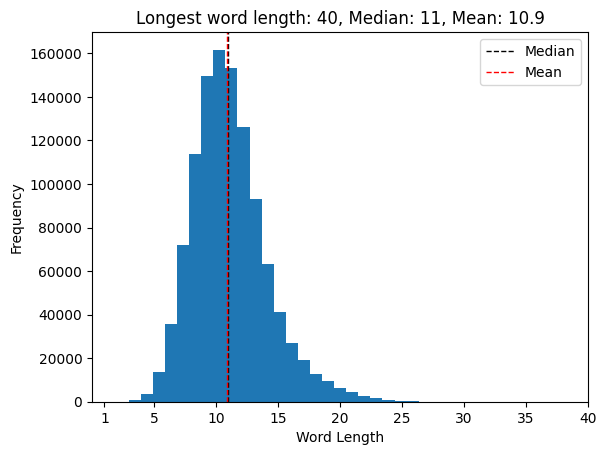

In [19]:
word_lengths = words_df['word'].str.len()
mean_length = word_lengths.mean()
median_length = word_lengths.median()
word_longest = word_lengths.max()
plt.hist(word_lengths, bins=word_longest)
plt.axvline(median_length, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Median', 'Mean'])
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title(f'Longest word length: {word_longest}, Median: {median_length:.0f}, Mean: {mean_length:.1f}')
plt.xticks([1, 5, 10, 15, 20, 25, 30, 35, 40])
plt.xlim(0, 40)
plt.show()

* **OBSERVATION**: Not suprisingly, the length distribution is almost identical to the `Chitanka` one.

## 11. Merge with vocabulary

So far, we had `1 228 258` unique valid Bulgarian words in our vocabulary. Let's see what will be the merged set size.

In [20]:
# Read our vocabulary
vocab_df = pd.read_csv('data/words.txt.gz', encoding='windows-1251', header=None, compression='gzip')
vocab_set = set(vocab_df[0].tolist())
print(f"Number of words in vocabulary: {len(vocab_set):,}")

# Current set
bg_dict_words_set = set(words_df['word'].tolist())

# Let's merge the two sets
merged_vocab_set = vocab_set.union(bg_dict_words_set)
print(f"Number of words in vocabulary (after merge): {len(merged_vocab_set):,}")

# Print the new words
print(sorted(merged_vocab_set - vocab_set))

Number of words in vocabulary: 1,228,258
Number of words in vocabulary (after merge): 1,228,263
['гаче', 'ний', 'николко', 'подръка', 'сбогом']


* **OBSERVATION**: Unfortunately, but not suprisingly, we augment our vocabulary only with `5` new words. Current set, didn't bring us a lot of value. Probably, it could be more useful in our next project (augmenting the vocabulary items with PoS tags).

In [21]:
# Sort and dump the new vocabulary
words = sorted(list(merged_vocab_set))
with open('data/words.txt', 'w', encoding='windows-1251') as f:
    for word in words:
        f.write(word + '\n')

# Convert to gzip
with open('data/words.txt', 'rb') as f_in:
    with gzip.open('data/words.txt.gz', 'wb') as f_out:
        f_out.writelines(f_in)

# Remove the original file
os.remove('data/words.txt')

print(f"Number of words written to file: {len(words):,}")

Number of words written to file: 1,228,263
